In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
df = pd.read_csv("/kaggle/input/resource-data-cpu-mem/resource_data (3).csv")

# Data Exploration

In [3]:
df.head(10)

,Timestamp,Total_CPU_%,Total_RAM_%,Free_RAM_%,PID,Process_Name,CPU_Usage_%,CPU_Affinity,CPU_Time_s,Context_Switches,Memory_Usage_%,VMS_MB,User_Priority,Thread_Count
0,1742757106,20.6,49.4,50.6,21072,python.exe,0.0,12,3.140625,3869,0.391195,424.449219,32,18
1,1742757106,20.6,49.4,50.6,23636,audiodg.exe,28.7,12,17370.734380,12689863,0.224756,77.816406,32,18
2,1742757107,20.6,49.4,50.6,12480,nvsphelper64.exe,0.0,12,1354.000000,22783639,0.009619,2.800781,32,6
3,1742757107,20.6,49.4,50.6,16236,chrome.exe,0.0,12,4198.906250,64754849,1.283285,257.062500,32,45
4,1742757107,20.6,49.4,50.6,17996,Discord.exe,14.3,12,20936.828130,195043660,1.948747,729.011719,64,83
5,1742757107,20.6,49.4,50.6,7568,NVIDIA Overlay.exe,0.0,12,884.281250,39791935,0.161328,185.781250,32768,41
6,1742757107,20.6,49.4,50.6,12168,RuntimeBroker.exe,0.0,12,4.812500,13461,0.084456,9.187500,32,4
7,1742757108,20.6,49.4,50.6,14388,Taskmgr.exe,0.0,12,151.125000,905031,0.565055,108.378906,32,26
8,1742757108,20.6,49.4,50.6,712,TextInputHost.exe,0.0,12,226.765625,2161840,0.325798,178.574219,128,64
9,1742757110,20.6,49.4,50.6,1648,chrome.exe,0.0,12,20.343750,377712,0.039144,12.277344,32,10


In [4]:
df.tail(5)

,Timestamp,Total_CPU_%,Total_RAM_%,Free_RAM_%,PID,Process_Name,CPU_Usage_%,CPU_Affinity,CPU_Time_s,Context_Switches,Memory_Usage_%,VMS_MB,User_Priority,Thread_Count
1504,1742757871,38.1,73.7,26.3,16236,chrome.exe,0.0,12,4224.156250,65125448,1.313493,252.812500,32,45
1505,1742757872,38.1,73.7,26.3,5716,chrome.exe,0.0,12,982.843750,19960939,0.228092,42.445312,32,26
1506,1742757872,38.1,73.7,26.3,3156,Discord.exe,0.0,12,7.171875,26857,1.427279,267.804688,32,30
1507,1742757872,38.1,73.7,26.3,712,TextInputHost.exe,0.0,12,228.406250,2213380,0.341797,178.734375,128,66
1508,1742757874,38.1,73.7,26.3,1648,chrome.exe,0.0,12,20.359375,379519,0.039876,12.289062,32,10


In [5]:
df.size

21126

In [6]:
print("no of rows: ", df.shape[0])
print("no of columns: ", df.shape[1])

no of rows:  1509
no of columns:  14


In [7]:
df.columns

Index(['Timestamp', 'Total_CPU_%', 'Total_RAM_%', 'Free_RAM_%', 'PID',
       'Process_Name', 'CPU_Usage_%', 'CPU_Affinity', 'CPU_Time_s',
       'Context_Switches', 'Memory_Usage_%', 'VMS_MB', 'User_Priority',
       'Thread_Count'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1509 entries, 0 to 1508
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Timestamp         1509 non-null   int64  
 1   Total_CPU_%       1509 non-null   float64
 2   Total_RAM_%       1509 non-null   float64
 3   Free_RAM_%        1509 non-null   float64
 4   PID               1509 non-null   int64  
 5   Process_Name      1509 non-null   object 
 6   CPU_Usage_%       1509 non-null   float64
 7   CPU_Affinity      1509 non-null   int64  
 8   CPU_Time_s        1509 non-null   float64
 9   Context_Switches  1509 non-null   int64  
 10  Memory_Usage_%    1509 non-null   float64
 11  VMS_MB            1509 non-null   float64
 12  User_Priority     1509 non-null   int64  
 13  Thread_Count      1509 non-null   int64  
dtypes: float64(7), int64(6), object(1)
memory usage: 165.2+ KB


In [9]:
df.describe()

,Timestamp,Total_CPU_%,Total_RAM_%,Free_RAM_%,PID,CPU_Usage_%,CPU_Affinity,CPU_Time_s,Context_Switches,Memory_Usage_%,VMS_MB,User_Priority,Thread_Count
count,1.509000e+03,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.0,1509.000000,1.509000e+03,1509.000000,1509.000000,1509.000000,1509.000000
mean,1.742757e+09,31.900530,65.701524,34.298476,17724.029158,7.849370,12.0,2303.715623,1.842769e+07,0.897257,317.810424,2862.102054,55.003313
std,2.176606e+02,12.530993,7.449617,7.449617,10863.185225,31.940836,0.0,5410.038262,4.348690e+07,1.426299,622.649827,9185.268683,109.146444
min,1.742757e+09,11.000000,49.400000,24.700000,712.000000,0.000000,12.0,0.093750,9.100000e+01,0.006868,1.675781,32.000000,1.000000
25%,1.742757e+09,21.400000,62.600000,26.300000,9340.000000,0.000000,12.0,20.343750,9.189900e+04,0.230534,51.355469,32.000000,18.000000
50%,1.742758e+09,30.900000,65.600000,34.400000,17996.000000,0.000000,12.0,184.703125,9.997630e+05,0.473454,178.628906,32.000000,27.000000
75%,1.742758e+09,40.400000,73.700000,37.400000,25992.000000,0.000000,12.0,716.515625,8.362426e+06,1.162207,379.210938,64.000000,49.000000
max,1.742758e+09,61.100000,75.300000,50.600000,37484.000000,440.300000,12.0,20965.578130,1.950763e+08,10.459408,4656.078125,32768.000000,730.000000


In [10]:
df.sort_values(by='CPU_Usage_%', ascending=False).copy()

,Timestamp,Total_CPU_%,Total_RAM_%,Free_RAM_%,PID,Process_Name,CPU_Usage_%,CPU_Affinity,CPU_Time_s,Context_Switches,Memory_Usage_%,VMS_MB,User_Priority,Thread_Count
645,1742757454,28.9,66.2,33.8,24488,chrome.exe,440.3,12,2107.156250,25604076,2.795817,764.718750,32,28
293,1742757287,54.8,66.5,33.5,12244,VALORANT-Win64-Shipping.exe,432.2,12,53.343750,356627,9.591764,3562.007813,32,716
343,1742757312,39.9,70.0,30.0,12244,VALORANT-Win64-Shipping.exe,358.4,12,84.921875,658579,10.459408,4656.078125,32,730
1114,1742757684,33.7,74.2,25.8,32992,VALORANT-Win64-Shipping.exe,268.8,12,120.281250,592449,9.524593,4399.316406,32,729
1053,1742757656,32.3,73.6,26.4,32992,VALORANT-Win64-Shipping.exe,266.0,12,70.734375,275336,10.151090,4158.644531,32,716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,1742757400,24.2,64.5,35.5,34172,steamwebhelper.exe,0.0,12,10.671875,100572,1.787386,396.507812,32,18
535,1742757400,24.2,64.5,35.5,7524,EpicWebHelper.exe,0.0,12,5.781250,61258,0.485645,174.671875,32768,43
532,1742757400,24.2,64.5,35.5,33948,EpicWebHelper.exe,0.0,12,23.000000,113300,1.242318,264.566406,32,30
530,1742757399,24.2,64.5,35.5,21072,python.exe,0.0,12,118.640625,211482,0.401839,425.972656,32,12


In [11]:
process_counts = df['Process_Name'].value_counts()
print("\nProcess Distribution:")
print(process_counts.size)
print(process_counts)


Process Distribution:
44
Process_Name
chrome.exe                     341
Code.exe                       172
Discord.exe                    107
python.exe                      89
TextInputHost.exe               89
Taskmgr.exe                     85
taskhostw.exe                   66
EpicWebHelper.exe               59
audiodg.exe                     55
explorer.exe                    47
VALORANT-Win64-Shipping.exe     46
steamwebhelper.exe              44
EpicGamesLauncher.exe           41
Riot Client.exe                 32
nvsphelper64.exe                28
RuntimeBroker.exe               24
nvcontainer.exe                 21
NVIDIA Overlay.exe              19
steam.exe                       18
UnrealCEFSubProcess.exe         16
msedge.exe                      15
RiotClientServices.exe          15
NahimicSvc64.exe                14
vgtray.exe                       6
powershell.exe                   5
ctfmon.exe                       5
ipf_helper.exe                   5
svchost.exe     

In [12]:
top_cpu_processes = df.groupby('Process_Name')['CPU_Usage_%'].mean().sort_values(ascending=False).head(10)
print("\nTop CPU-Intensive Processes:")
print(top_cpu_processes)

top_memory_processes = df.groupby('Process_Name')['Memory_Usage_%'].mean().sort_values(ascending=False).head(10)
print("\nTop Memory-Intensive Processes:")
print(top_memory_processes)


Top CPU-Intensive Processes:
Process_Name
VALORANT-Win64-Shipping.exe    124.047826
RiotClientServices.exe          12.186667
EpicGamesLauncher.exe           12.168293
Riot Client.exe                 10.025000
steam.exe                        9.522222
Taskmgr.exe                      7.650588
chrome.exe                       6.956891
steamwebhelper.exe               5.409091
explorer.exe                     5.300000
EpicWebHelper.exe                5.211864
Name: CPU_Usage_%, dtype: float64

Top Memory-Intensive Processes:
Process_Name
VALORANT-Win64-Shipping.exe    7.175559
RiotClientServices.exe         1.496313
Discord.exe                    1.430358
SearchHost.exe                 1.243962
explorer.exe                   1.180709
WinStore.App.exe               1.062675
Riot Client.exe                1.047703
EpicGamesLauncher.exe          1.031207
chrome.exe                     0.962821
WWAHost.exe                    0.830827
Name: Memory_Usage_%, dtype: float64


In [13]:
plt.style.use('seaborn')
sns.set_palette("husl")  # Use a colorful palette
%matplotlib inline

<ipython-input-13-c7ce72ccad0e>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Data loaded successfully!


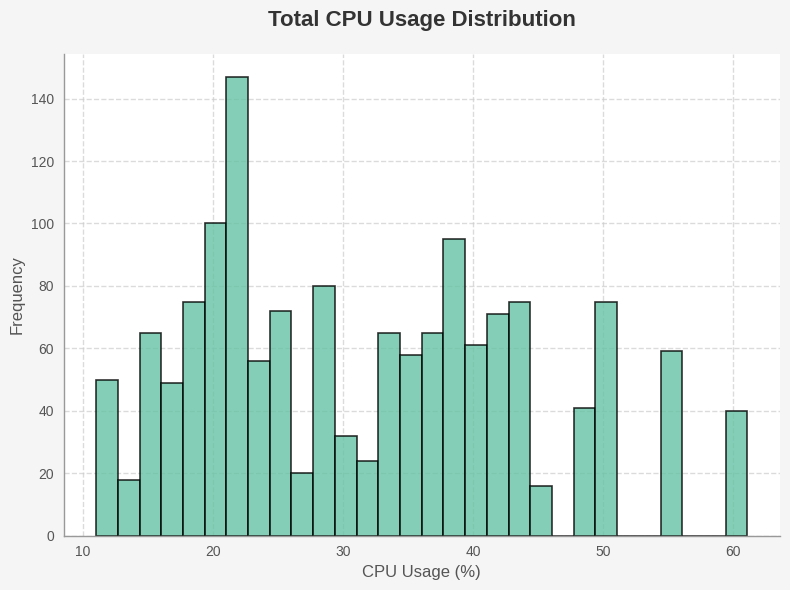

In [14]:
plt.style.use('ggplot')  # Clean and modern look
sns.set_palette("Set2")  # Vibrant, professional colors
%matplotlib inline

# Load the data
data = pd.read_csv('/kaggle/input/resource-data-cpu-mem/resource_data (3).csv')
print("Data loaded successfully!")

# Plot 1: Total CPU % - Beautified
plt.figure(figsize=(8, 6), facecolor='#f5f5f5')  # Light background for the figure
plt.hist(data['Total_CPU_%'], bins=30, color='#66c2a5', edgecolor='black', alpha=0.8, linewidth=1.2)  # Soft green with transparency
plt.title('Total CPU Usage Distribution', fontsize=16, fontweight='bold', color='#333333', pad=20)
plt.xlabel('CPU Usage (%)', fontsize=12, color='#555555')
plt.ylabel('Frequency', fontsize=12, color='#555555')
plt.grid(True, linestyle='--', alpha=0.7, color='#cccccc')  # Subtle grid lines
plt.gca().set_facecolor('#ffffff')  # White plot background
plt.gca().spines['top'].set_visible(False)  # Remove top spine
plt.gca().spines['right'].set_visible(False)  # Remove right spine
plt.gca().spines['left'].set_color('#999999')
plt.gca().spines['bottom'].set_color('#999999')
plt.tick_params(axis='both', which='major', labelsize=10, colors='#555555')
plt.tight_layout()
plt.savefig("total_cpu.png")
plt.show()

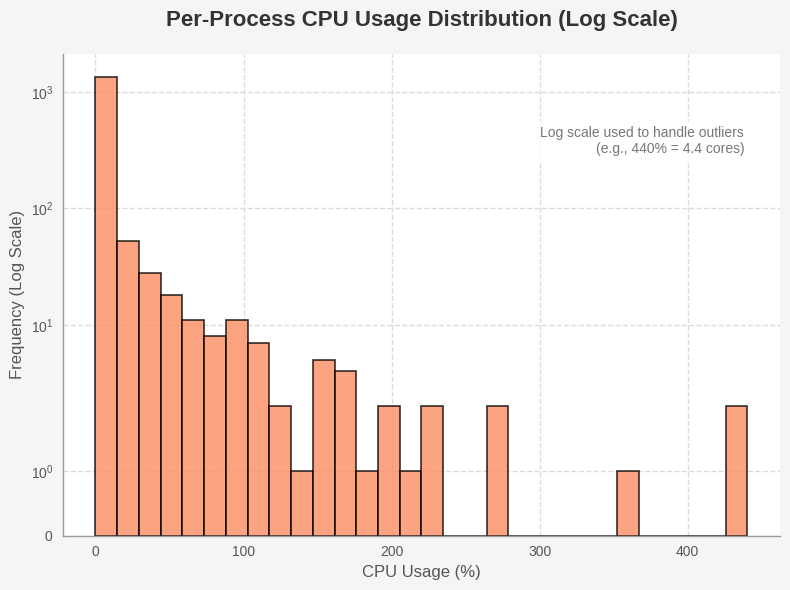

In [15]:
# Plot 2: CPU Usage % (Per Process) with Log Scale - Beautified
plt.figure(figsize=(8, 6), facecolor='#f5f5f5')
plt.hist(data['CPU_Usage_%'], bins=30, color='#fc8d62', edgecolor='black', alpha=0.8, linewidth=1.2)  # Warm orange
plt.yscale('symlog')  # Log scale to handle outliers like 440%
plt.title('Per-Process CPU Usage Distribution (Log Scale)', fontsize=16, fontweight='bold', color='#333333', pad=20)
plt.xlabel('CPU Usage (%)', fontsize=12, color='#555555')
plt.ylabel('Frequency (Log Scale)', fontsize=12, color='#555555')
plt.grid(True, linestyle='--', alpha=0.7, color='#cccccc')
plt.gca().set_facecolor('#ffffff')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('#999999')
plt.gca().spines['bottom'].set_color('#999999')
plt.tick_params(axis='both', which='major', labelsize=10, colors='#555555')
# Add a note about the log scale
plt.text(0.95, 0.85, 'Log scale used to handle outliers\n(e.g., 440% = 4.4 cores)', 
         transform=plt.gca().transAxes, fontsize=10, color='#777777', 
         ha='right', va='top', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
plt.tight_layout()
plt.savefig("per_process_cpu_usage.png")
plt.show()

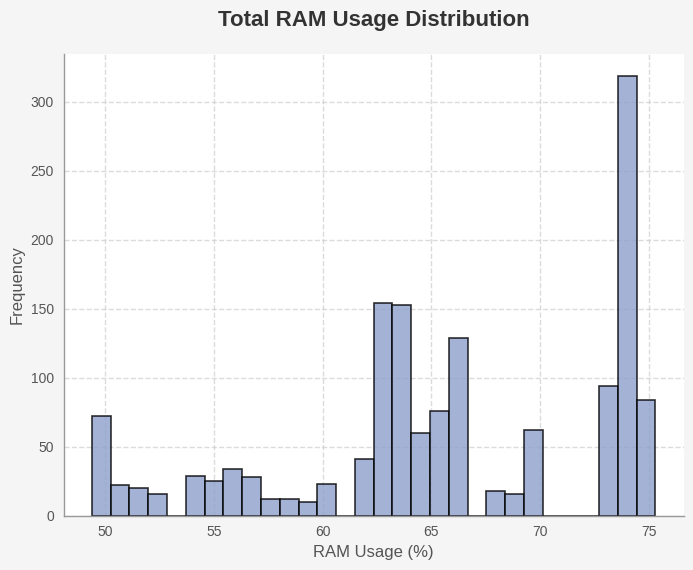

In [16]:
# Plot 3: Total RAM %
plt.figure(figsize=(8, 6), facecolor='#f5f5f5')
plt.hist(data['Total_RAM_%'], bins=30, color='#8da0cb', edgecolor='black', alpha=0.8, linewidth=1.2)  # Soft purple
plt.title('Total RAM Usage Distribution', fontsize=16, fontweight='bold', color='#333333', pad=20)
plt.xlabel('RAM Usage (%)', fontsize=12, color='#555555')
plt.ylabel('Frequency', fontsize=12, color='#555555')
plt.grid(True, linestyle='--', alpha=0.7, color='#cccccc')
plt.gca().set_facecolor('#ffffff')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('#999999')
plt.gca().spines['bottom'].set_color('#999999')
plt.tick_params(axis='both', which='major', labelsize=10, colors='#555555')
plt.tight_layout
plt.savefig("total_ram_dist.png")
plt.show()

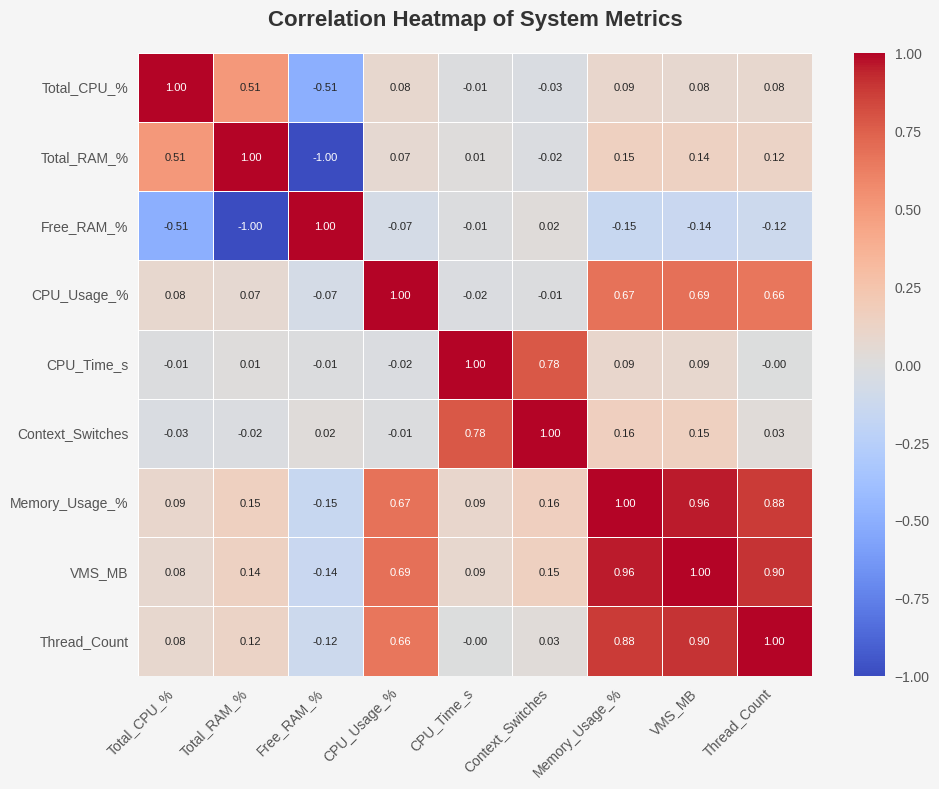

In [17]:
# Create a correlation heatmap
plt.figure(figsize=(10, 8), facecolor='#f5f5f5')
numeric_cols = [
    'Total_CPU_%', 'Total_RAM_%', 'Free_RAM_%', 'CPU_Usage_%', 
    'CPU_Time_s', 'Context_Switches', 'Memory_Usage_%', 'VMS_MB', 
    'Thread_Count'
]
corr_matrix = data[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, 
            annot_kws={'size': 8}, linewidths=0.5, linecolor='white')
plt.title('Correlation Heatmap of System Metrics', fontsize=16, fontweight='bold', color='#333333', pad=20)
plt.xticks(fontsize=10, rotation=45, ha='right', color='#555555')
plt.yticks(fontsize=10, color='#555555')
plt.gca().set_facecolor('#ffffff')
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.show()

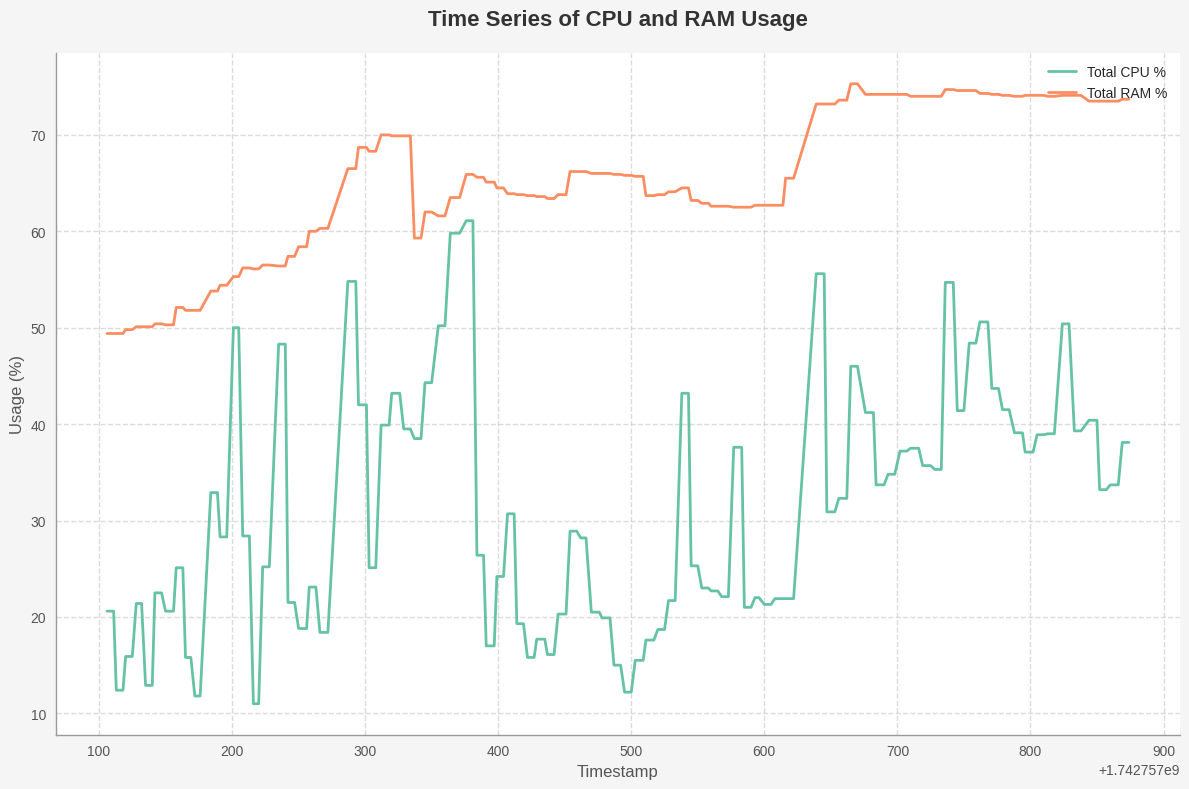

In [18]:

# Plot time series for Total CPU % and Total RAM %
plt.figure(figsize=(12, 8), facecolor='#f5f5f5')
plt.plot(data['Timestamp'], data['Total_CPU_%'], color='#66c2a5', label='Total CPU %', linewidth=2)
plt.plot(data['Timestamp'], data['Total_RAM_%'], color='#fc8d62', label='Total RAM %', linewidth=2)
plt.title('Time Series of CPU and RAM Usage', fontsize=16, fontweight='bold', color='#333333', pad=20)
plt.xlabel('Timestamp', fontsize=12, color='#555555')
plt.ylabel('Usage (%)', fontsize=12, color='#555555')
plt.grid(True, linestyle='--', alpha=0.7, color='#cccccc')
plt.gca().set_facecolor('#ffffff')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('#999999')
plt.gca().spines['bottom'].set_color('#999999')
plt.tick_params(axis='both', which='major', labelsize=10, colors='#555555')
plt.legend(fontsize=10, loc='upper right')
plt.tight_layout()
plt.savefig('time_series_cpu_and_mem.png')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Figure size 1200x1000 with 0 Axes>

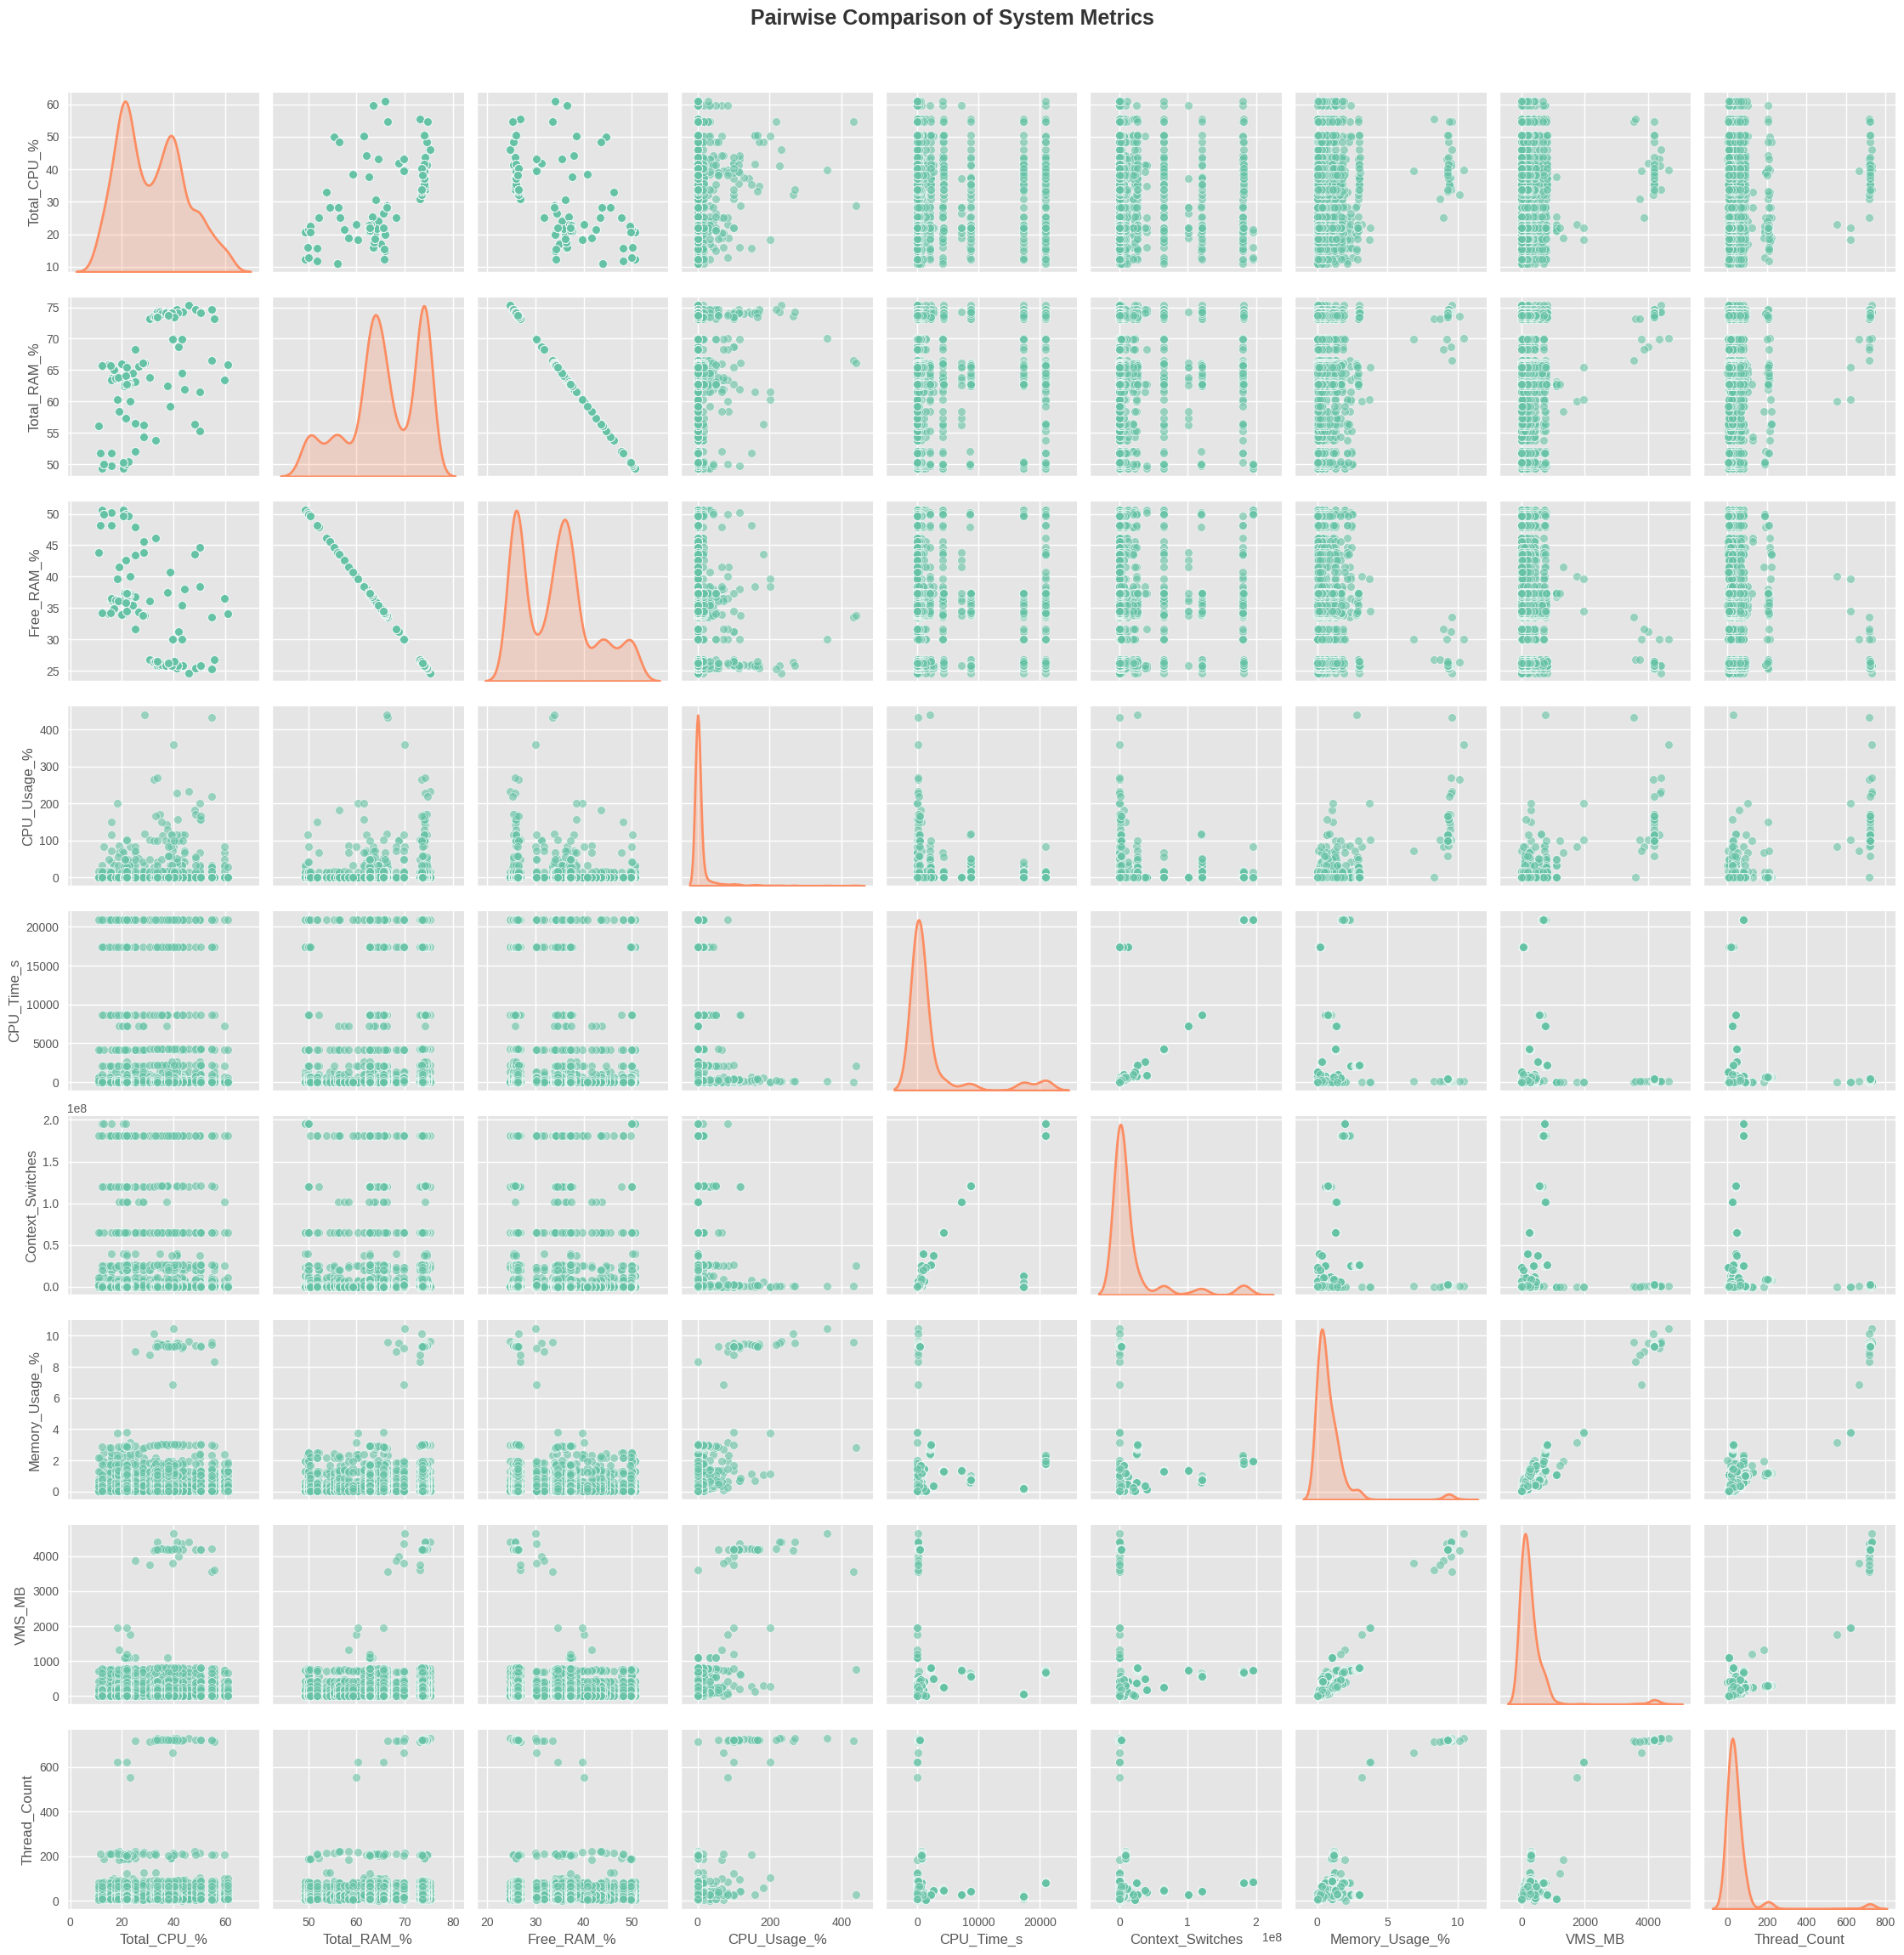

In [19]:
numeric_cols = [
    'Total_CPU_%', 'Total_RAM_%', 'Free_RAM_%', 'CPU_Usage_%', 
    'CPU_Time_s', 'Context_Switches', 'Memory_Usage_%', 'VMS_MB', 
    'Thread_Count'
]

# Create a pair plot to compare all columns
plt.figure(figsize=(12, 10), facecolor='#f5f5f5')
sns.pairplot(data[numeric_cols], diag_kind='kde', plot_kws={'alpha': 0.6, 's': 50, 'color': '#66c2a5'}, 
             diag_kws={'color': '#fc8d62', 'linewidth': 2})
plt.suptitle('Pairwise Comparison of System Metrics', fontsize=18, fontweight='bold', color='#333333', y=1.02)
plt.tight_layout()
plt.savefig('pair_plot.png')
plt.show()

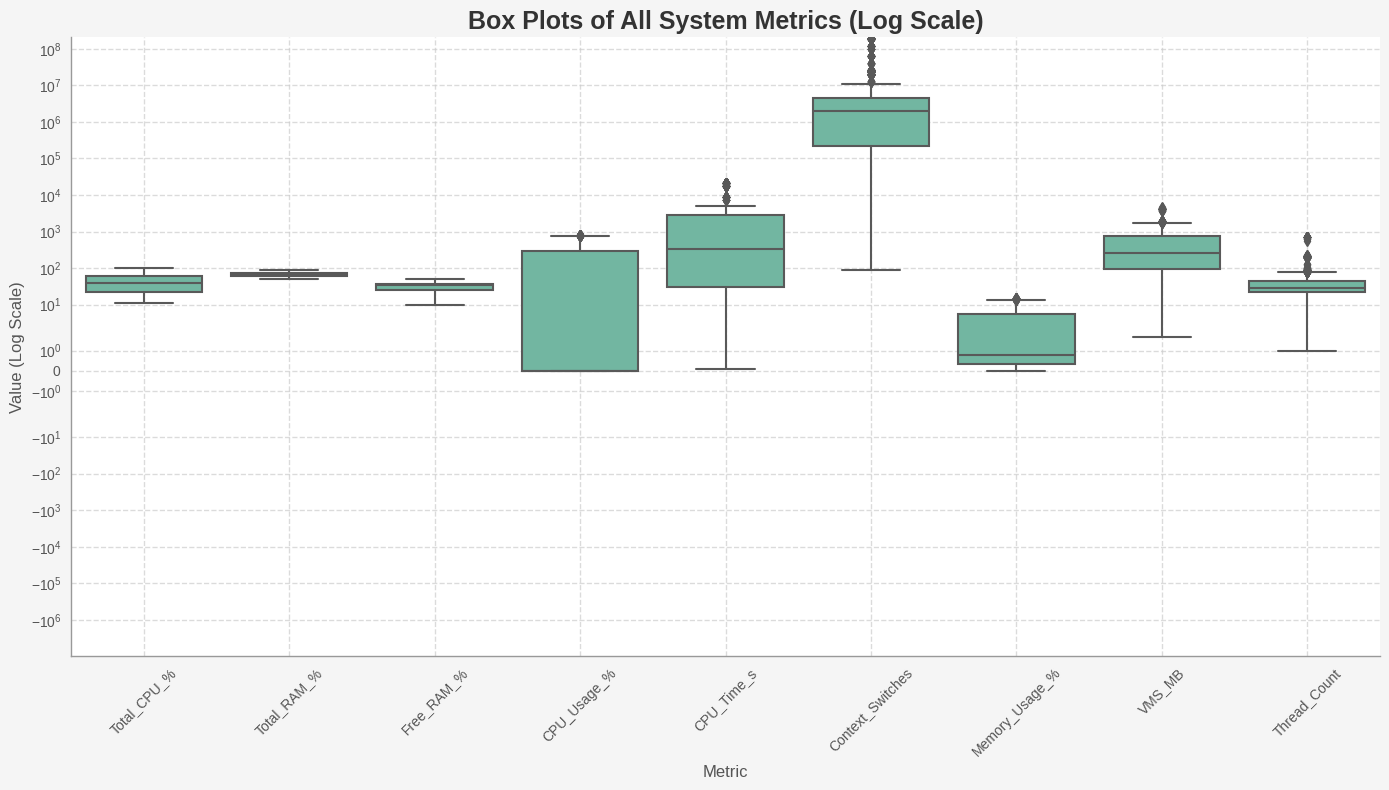

In [30]:
numeric_cols = [
    'Total_CPU_%', 'Total_RAM_%', 'Free_RAM_%', 'CPU_Usage_%', 
    'CPU_Time_s', 'Context_Switches', 'Memory_Usage_%', 'VMS_MB', 
    'Thread_Count'
]

# Melt the data to long format for a single box plot
data_melted = data[numeric_cols].melt()

# Create a single figure with all box plots
plt.figure(figsize=(14, 8), facecolor='#f5f5f5')
sns.boxplot(x='variable', y='value', data=data_melted, color='#66c2a5', fliersize=5, linewidth=1.5)
plt.yscale('symlog')  # Log scale for all to handle outliers
plt.title('Box Plots of All System Metrics (Log Scale)', fontsize=18, fontweight='bold', color='#333333')
plt.xlabel('Metric', fontsize=12, color='#555555')
plt.ylabel('Value (Log Scale)', fontsize=12, color='#555555')
plt.xticks(rotation=45, fontsize=10, color='#555555')
plt.grid(True, linestyle='--', alpha=0.7, color='#cccccc')
plt.gca().set_facecolor('#ffffff')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('#999999')
plt.gca().spines['bottom'].set_color('#999999')
plt.tick_params(axis='both', which='major', labelsize=10, colors='#555555')
plt.tight_layout()
plt.savefig("box_plot.png")
plt.show()

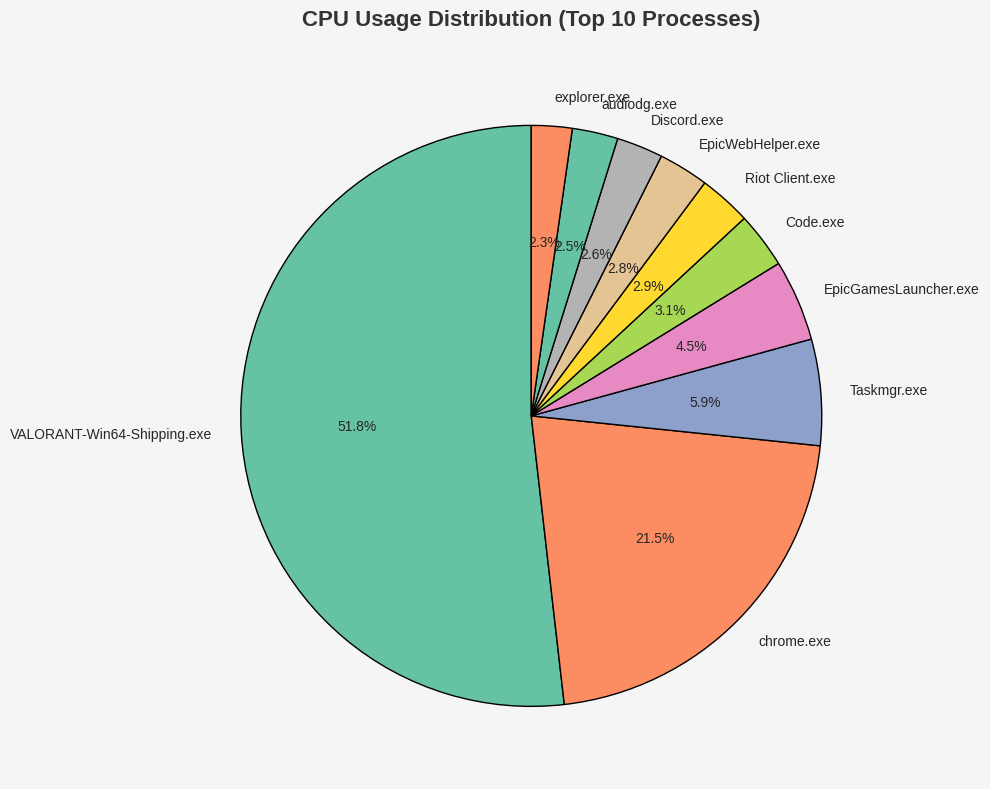

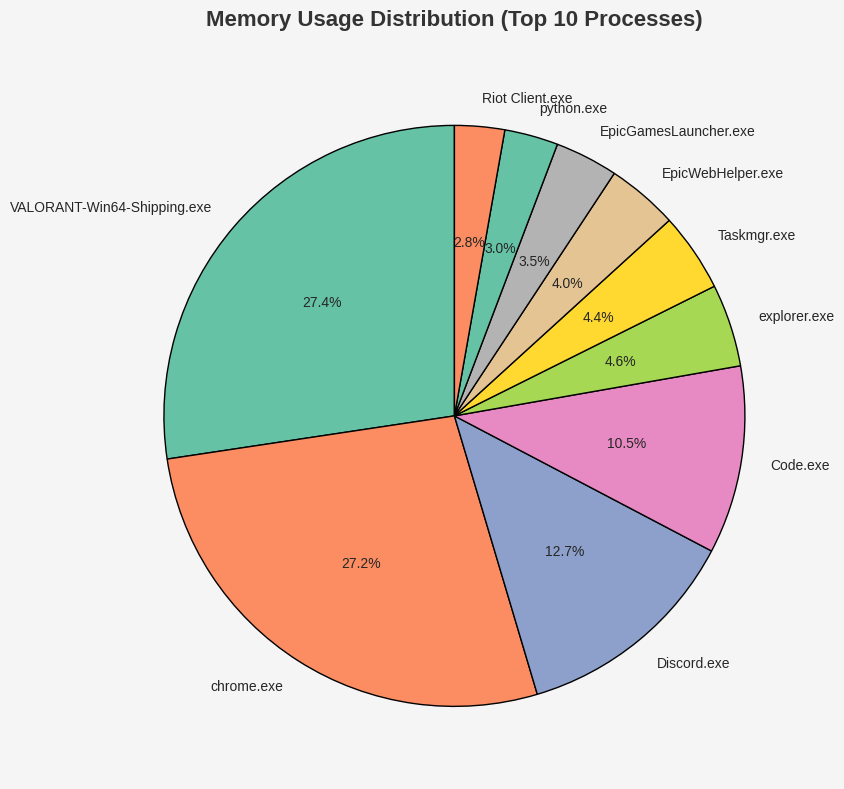

<Figure size 1200x800 with 0 Axes>

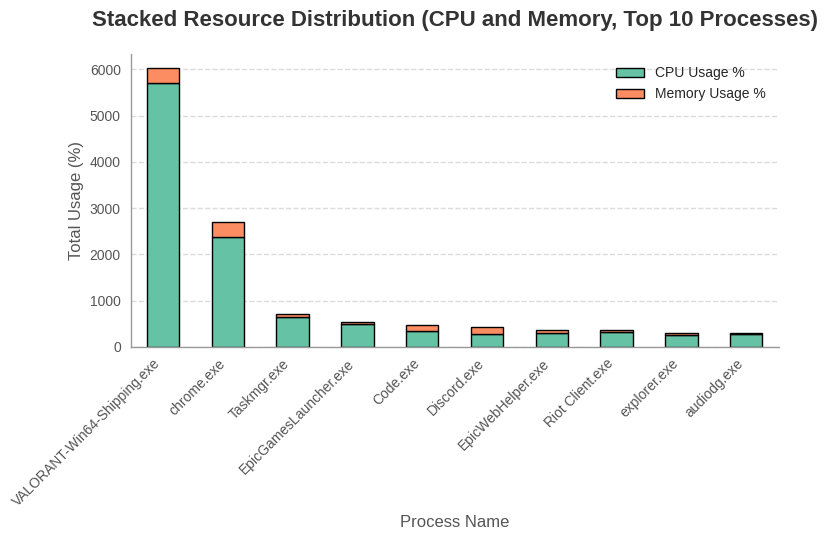

In [21]:
# Plot 1: Resource Distribution - CPU Usage by Top 10 Processes (Pie Chart)
plt.figure(figsize=(10, 8), facecolor='#f5f5f5')
cpu_usage_by_process = data.groupby('Process_Name')['CPU_Usage_%'].sum().sort_values(ascending=False).head(10)  # Changed to top 10
plt.pie(cpu_usage_by_process, labels=cpu_usage_by_process.index, autopct='%1.1f%%', startangle=90, 
        colors=sns.color_palette("Set2", 10), wedgeprops={'edgecolor': 'black', 'linewidth': 1},  # Changed to 10 colors
        textprops={'fontsize': 10})
plt.title('CPU Usage Distribution (Top 10 Processes)', fontsize=16, fontweight='bold', color='#333333', pad=20)
plt.gca().set_facecolor('#ffffff')
plt.tight_layout()
plt.savefig('CPU Usage Distribution.png')
plt.show()

# Plot 2: Resource Distribution - Memory Usage by Top 10 Processes (Pie Chart)
plt.figure(figsize=(10, 8), facecolor='#f5f5f5')
memory_usage_by_process = data.groupby('Process_Name')['Memory_Usage_%'].sum().sort_values(ascending=False).head(10)  # Changed to top 10
plt.pie(memory_usage_by_process, labels=memory_usage_by_process.index, autopct='%1.1f%%', startangle=90, 
        colors=sns.color_palette("Set2", 10), wedgeprops={'edgecolor': 'black', 'linewidth': 1},  # Changed to 10 colors
        textprops={'fontsize': 10})
plt.title('Memory Usage Distribution (Top 10 Processes)', fontsize=16, fontweight='bold', color='#333333', pad=20)
plt.gca().set_facecolor('#ffffff')
plt.tight_layout()
plt.savefig("Memory Usage Distribution.png")
plt.show()

# Plot 3: Resource Distribution - Stacked Bar Chart for CPU and Memory Usage (Top 10 Processes)
plt.figure(figsize=(12, 8), facecolor='#f5f5f5')
process_summary = data.groupby('Process_Name')[['CPU_Usage_%', 'Memory_Usage_%']].sum()
top_10_processes = process_summary.sum(axis=1).sort_values(ascending=False).head(10).index  # Changed to top 10
process_summary_top_10 = process_summary.loc[top_10_processes]
process_summary_top_10.plot(kind='bar', stacked=True, color=['#66c2a5', '#fc8d62'], edgecolor='black', linewidth=1)
plt.title('Stacked Resource Distribution (CPU and Memory, Top 10 Processes)', fontsize=16, fontweight='bold', color='#333333', pad=20)
plt.xlabel('Process Name', fontsize=12, color='#555555')
plt.ylabel('Total Usage (%)', fontsize=12, color='#555555')
plt.xticks(rotation=45, fontsize=10, color='#555555', ha='right')
plt.grid(True, linestyle='--', alpha=0.7, color='#cccccc', axis='y')
plt.gca().set_facecolor('#ffffff')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('#999999')
plt.gca().spines['bottom'].set_color('#999999')
plt.legend(['CPU Usage %', 'Memory Usage %'], fontsize=10)
plt.tight_layout()
plt.savefig("Stacked Resource.png")
plt.show()

# Data Augmentation

In [22]:
df.describe()

,Timestamp,Total_CPU_%,Total_RAM_%,Free_RAM_%,PID,CPU_Usage_%,CPU_Affinity,CPU_Time_s,Context_Switches,Memory_Usage_%,VMS_MB,User_Priority,Thread_Count
count,1.509000e+03,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.0,1509.000000,1.509000e+03,1509.000000,1509.000000,1509.000000,1509.000000
mean,1.742757e+09,31.900530,65.701524,34.298476,17724.029158,7.849370,12.0,2303.715623,1.842769e+07,0.897257,317.810424,2862.102054,55.003313
std,2.176606e+02,12.530993,7.449617,7.449617,10863.185225,31.940836,0.0,5410.038262,4.348690e+07,1.426299,622.649827,9185.268683,109.146444
min,1.742757e+09,11.000000,49.400000,24.700000,712.000000,0.000000,12.0,0.093750,9.100000e+01,0.006868,1.675781,32.000000,1.000000
25%,1.742757e+09,21.400000,62.600000,26.300000,9340.000000,0.000000,12.0,20.343750,9.189900e+04,0.230534,51.355469,32.000000,18.000000
50%,1.742758e+09,30.900000,65.600000,34.400000,17996.000000,0.000000,12.0,184.703125,9.997630e+05,0.473454,178.628906,32.000000,27.000000
75%,1.742758e+09,40.400000,73.700000,37.400000,25992.000000,0.000000,12.0,716.515625,8.362426e+06,1.162207,379.210938,64.000000,49.000000
max,1.742758e+09,61.100000,75.300000,50.600000,37484.000000,440.300000,12.0,20965.578130,1.950763e+08,10.459408,4656.078125,32768.000000,730.000000


In [23]:
data = df

# Define CPU-intensive processes
cpu_intensive_apps = [
    'Adobe Illustrator', 'Blender', 'Adobe Premiere Pro', 'AutoCAD', 
    'MATLAB', 'Unity Editor', 'Visual Studio', 'Cinema 4D', 
    'SolidWorks', 'Photoshop'
]

# Parameters for dummy data
num_dummy_samples = 500
timestamps = data['Timestamp'].max() + np.arange(1, num_dummy_samples + 1) * 5  # Increment timestamps

# Create dummy data
dummy_data = []
for i in range(num_dummy_samples):
    app_name = np.random.choice(cpu_intensive_apps)
    dummy_row = {
        'Timestamp': timestamps[i],
        'Total_CPU_%': np.random.uniform(75, 100),  # High system CPU load
        'Total_RAM_%': np.random.uniform(60, 90),  # Moderate to high RAM usage
        'Free_RAM_%': 100 - np.random.uniform(60, 90),
        'PID': 10000 + i,  # Unique PIDs for dummy processes
        'Process_Name': app_name,
        'CPU_Usage_%': np.random.uniform(300, 800),  # High per-process usage (3-8 cores)
        'CPU_Affinity': 8,  # Corrected for 8-core CPU
        'CPU_Time_s': np.random.uniform(1000, 5000),  # High CPU time
        'Context_Switches': np.random.randint(1000000, 5000000),
        'Memory_Usage_%': np.random.uniform(5, 15),  # Moderate to high memory usage
        'VMS_MB': np.random.uniform(500, 2000),  # High virtual memory
        'User_Priority': 32,  # Same as existing data (to fix later)
        'Thread_Count': np.random.randint(20, 50),  # High thread count
    }
    dummy_data.append(dummy_row)

# Convert to DataFrame
dummy_df = pd.DataFrame(dummy_data)
print("Dummy data shape:", dummy_df.shape)

# Merge with existing data
combined_data = pd.concat([data, dummy_df], ignore_index=True)
print("Combined data shape:", combined_data.shape)

# Save the updated dataset
combined_data.to_csv('resource_data_with_dummy.csv', index=False)
print("Updated data saved to 'resource_data_with_dummy.csv'")

Dummy data shape: (500, 14)
Combined data shape: (2009, 14)
Updated data saved to 'resource_data_with_dummy.csv'
